In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.array([-2.23, -1.30, -0.42, 0.30, 0.33, 0.52, 0.87, 1.80, 2.74, 3.68])
y = np.array([1.01, 0.69, -0.66, -1.34, -1.75, -0.98, 0.25, 1.57, 1.65, 1.51])
 
beta = 4
def phi(x,k):
  ret = []
  for xt in x:
    t = [1]
    for i in range(1,k+1):
      t.append(xt**i)
    ret.append(t)
  return np.array(ret)


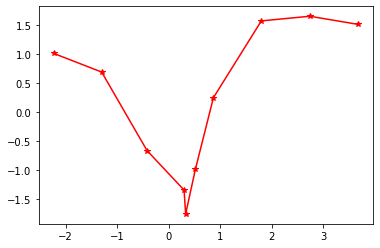

In [25]:
plt.plot(x,y,'r*-')
plt.show()

posterior of w \
$p(\omega|\mathbf{y,X}) = \mathcal{N}((\mathbf{X^TX}+\beta^{-1}\mathbf{I)^{-1}X^Ty},(\beta \mathbf{X^TX +I})^{-1} )$ 


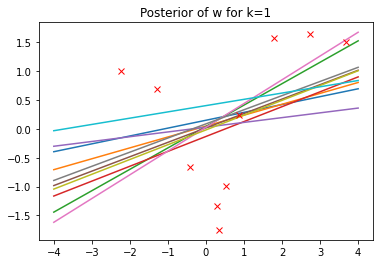

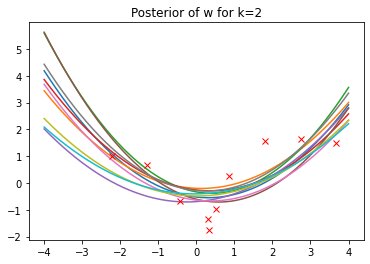

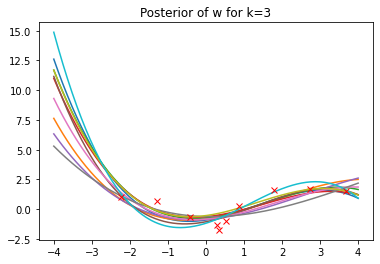

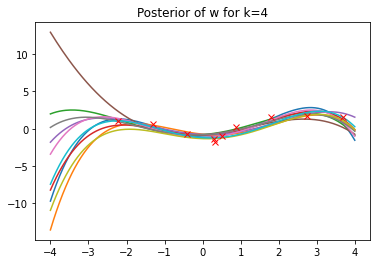

In [4]:
# part 1

# posterier of w is normal (lec 5-1)
all_mu = []
all_sig = []
plot_x = np.linspace(-4, 4, 200)
for k in range(1,5):
  X = phi(x,k) 
  I = np.identity(k+1)
  sigma_n = np.linalg.inv(beta*(X.T@X)+I)  # (b*(X^T X)+I)^{-1}
  mu_n = np.linalg.inv((X.T@X)+I/beta)@X.T@y # ((X^T X) + I/b)^{-1} X^T y
  sample_w = np.random.multivariate_normal(mu_n,sigma_n,size=10)
  
  for i in range(10):
    plt.plot(plot_x, phi(plot_x,k)@sample_w[i])
  plt.plot(x, y, 'rx') 
  plt.title('Posterior of w for k=' + str(k))
  plt.show()
  all_mu.append(mu_n)
  all_sig.append(sigma_n)



posterier predictive distribution mean
$p(y_*|x_*,\mathbf{y,X}) = \mathcal{N}(((\mathbf{X^TX}+\beta^{-1}\mathbf{I)^{-1}X^Ty})^Tx_*,\beta^{-1}+x_*^T(\beta \mathbf{X^TX +I})^{-1}x_*)$

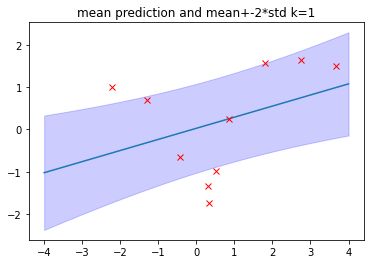

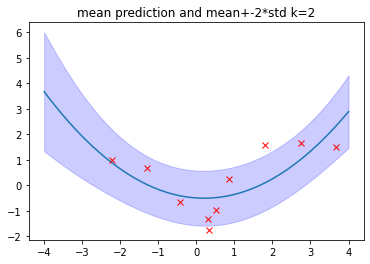

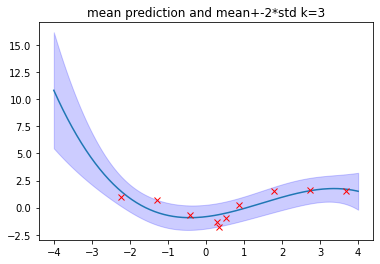

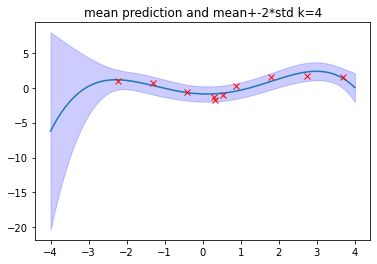

In [10]:
#posterier predictive distribution mean
for k in range(1,5):  
  pred_mu = phi(plot_x,k)@all_mu[k-1]
  pred_var = np.sqrt(((1/beta) + phi(plot_x,k) @ all_sig[k-1] @ phi(plot_x,k).T).diagonal())
  plt.fill_between(plot_x, pred_mu-2*pred_var, pred_mu+2*pred_var,
                 color='blue',       
                 alpha=0.2)
  plt.plot(plot_x,pred_mu)
  plt.title('mean prediction and mean+-2*std k=' + str(k))
  plt.plot(x,y,'rx')
  plt.show()


In [16]:
from scipy.stats import multivariate_normal
for k in range(1,5):
    X=phi(x, k)
    sigma=(1/beta)*np.eye(10)+X@X.T
    ml=np.log(multivariate_normal.pdf(y, np.zeros(10), sigma))
    print("k=",k," the marginal likelihood value is = ",ml)

k= 1  the marginal likelihood value is =  -32.325577919349065
k= 2  the marginal likelihood value is =  -23.126889656893887
k= 3  the marginal likelihood value is =  -22.12287495542345
k= 4  the marginal likelihood value is =  -22.605375642340185


In [22]:
for k in range(1,5):
    X=phi(x, k)
    mean=X@np.linalg.inv(X.T@X+(1/beta)*np.eye(k+1))@(X.T@y)
    var=1/beta*np.eye(10)
    likelihood=np.log(multivariate_normal.pdf(y, mean, var))
    print("k=",k," the likelihood value is = ",likelihood)

k= 1  the likelihood value is =  -28.061373030860793
k= 2  the likelihood value is =  -15.70039023251804
k= 3  the likelihood value is =  -10.915688165826634
k= 4  the likelihood value is =  -7.371110916347485
